# Data Cleaning

### Set-up Programming Environment

In [185]:
#install and import all necessary libraries

#!{sys.executable} -m pip install pandas
import pandas as pd

#!{sys.executable} -m pip install numpy
import numpy as np

#!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt

#!{sys.executable} -m pip install missingno
import missingno as msno

#!{sys.executable} -m pip install scipy
import scipy.stats as stats

#!{sys.executable} -m pip install scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

## Assess Data Quality

### Preview the Dataset & Data Types

In [186]:
dat_orig = pd.read_csv("~/Desktop/WGU/D206/churn_raw_data.csv") #load CSV
dat_orig.shape #show number of rows and columns in dataset

(10000, 52)

In [187]:
dat_orig.head() #shows first five rows of data

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


***Note***:
In the table above, the original index column from the dataset is unnamed. Python has added its own index column (starting at zero). The original index column will be named "OrigIndex" in order to maintain the complete the dataset.

In [188]:
dat_clean = dat_orig.rename(columns={'Unnamed: 0': 'OrigIndex'}) #rename the unnamed colomn and save as new dataframe
dat_clean.head() #preview new dataframe

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [189]:
dat_clean.info() #display data types and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrigIndex             10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

***Note:*** From the info() output, we can see that there are several variables with null values. We can also see that there are several variables that are "objects" and may be able to be re-expressed as numeric for analysis.

### Check for Duplicates

In [190]:
duplicates = dat_clean.duplicated() #find duplicates
dat_clean[duplicates] #view duplicates

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [192]:
#check for duplicates in specific colomns
dupcheck_col = ['Customer_id'] #specify columns
duplicates = dat_clean.duplicated(subset = dupcheck_col, keep = False) #check duplicates
dat_clean[duplicates] #show duplicates

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


***NOTE:*** From the above, it appearst here are no duplicates in the dataset that need to be removed. 

### Check for Outliers

array([[<Axes: title={'center': 'OrigIndex'}>,
        <Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Lng'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>],
       [<Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>],
       [<Axes: title={'center': 'Bandwidth_GB_Year'}>,
        <Axes: title={'center': 'item1'}>,
        <Axes: title={'center': 'item2'}>,
        <Axes: title={'center': 'item3'}>,
        <Axes: title={'center': 'item4'}>],
       [<Axes: title={'center': 'item5'}>,
        <Axes: title={'center': 'item6'}

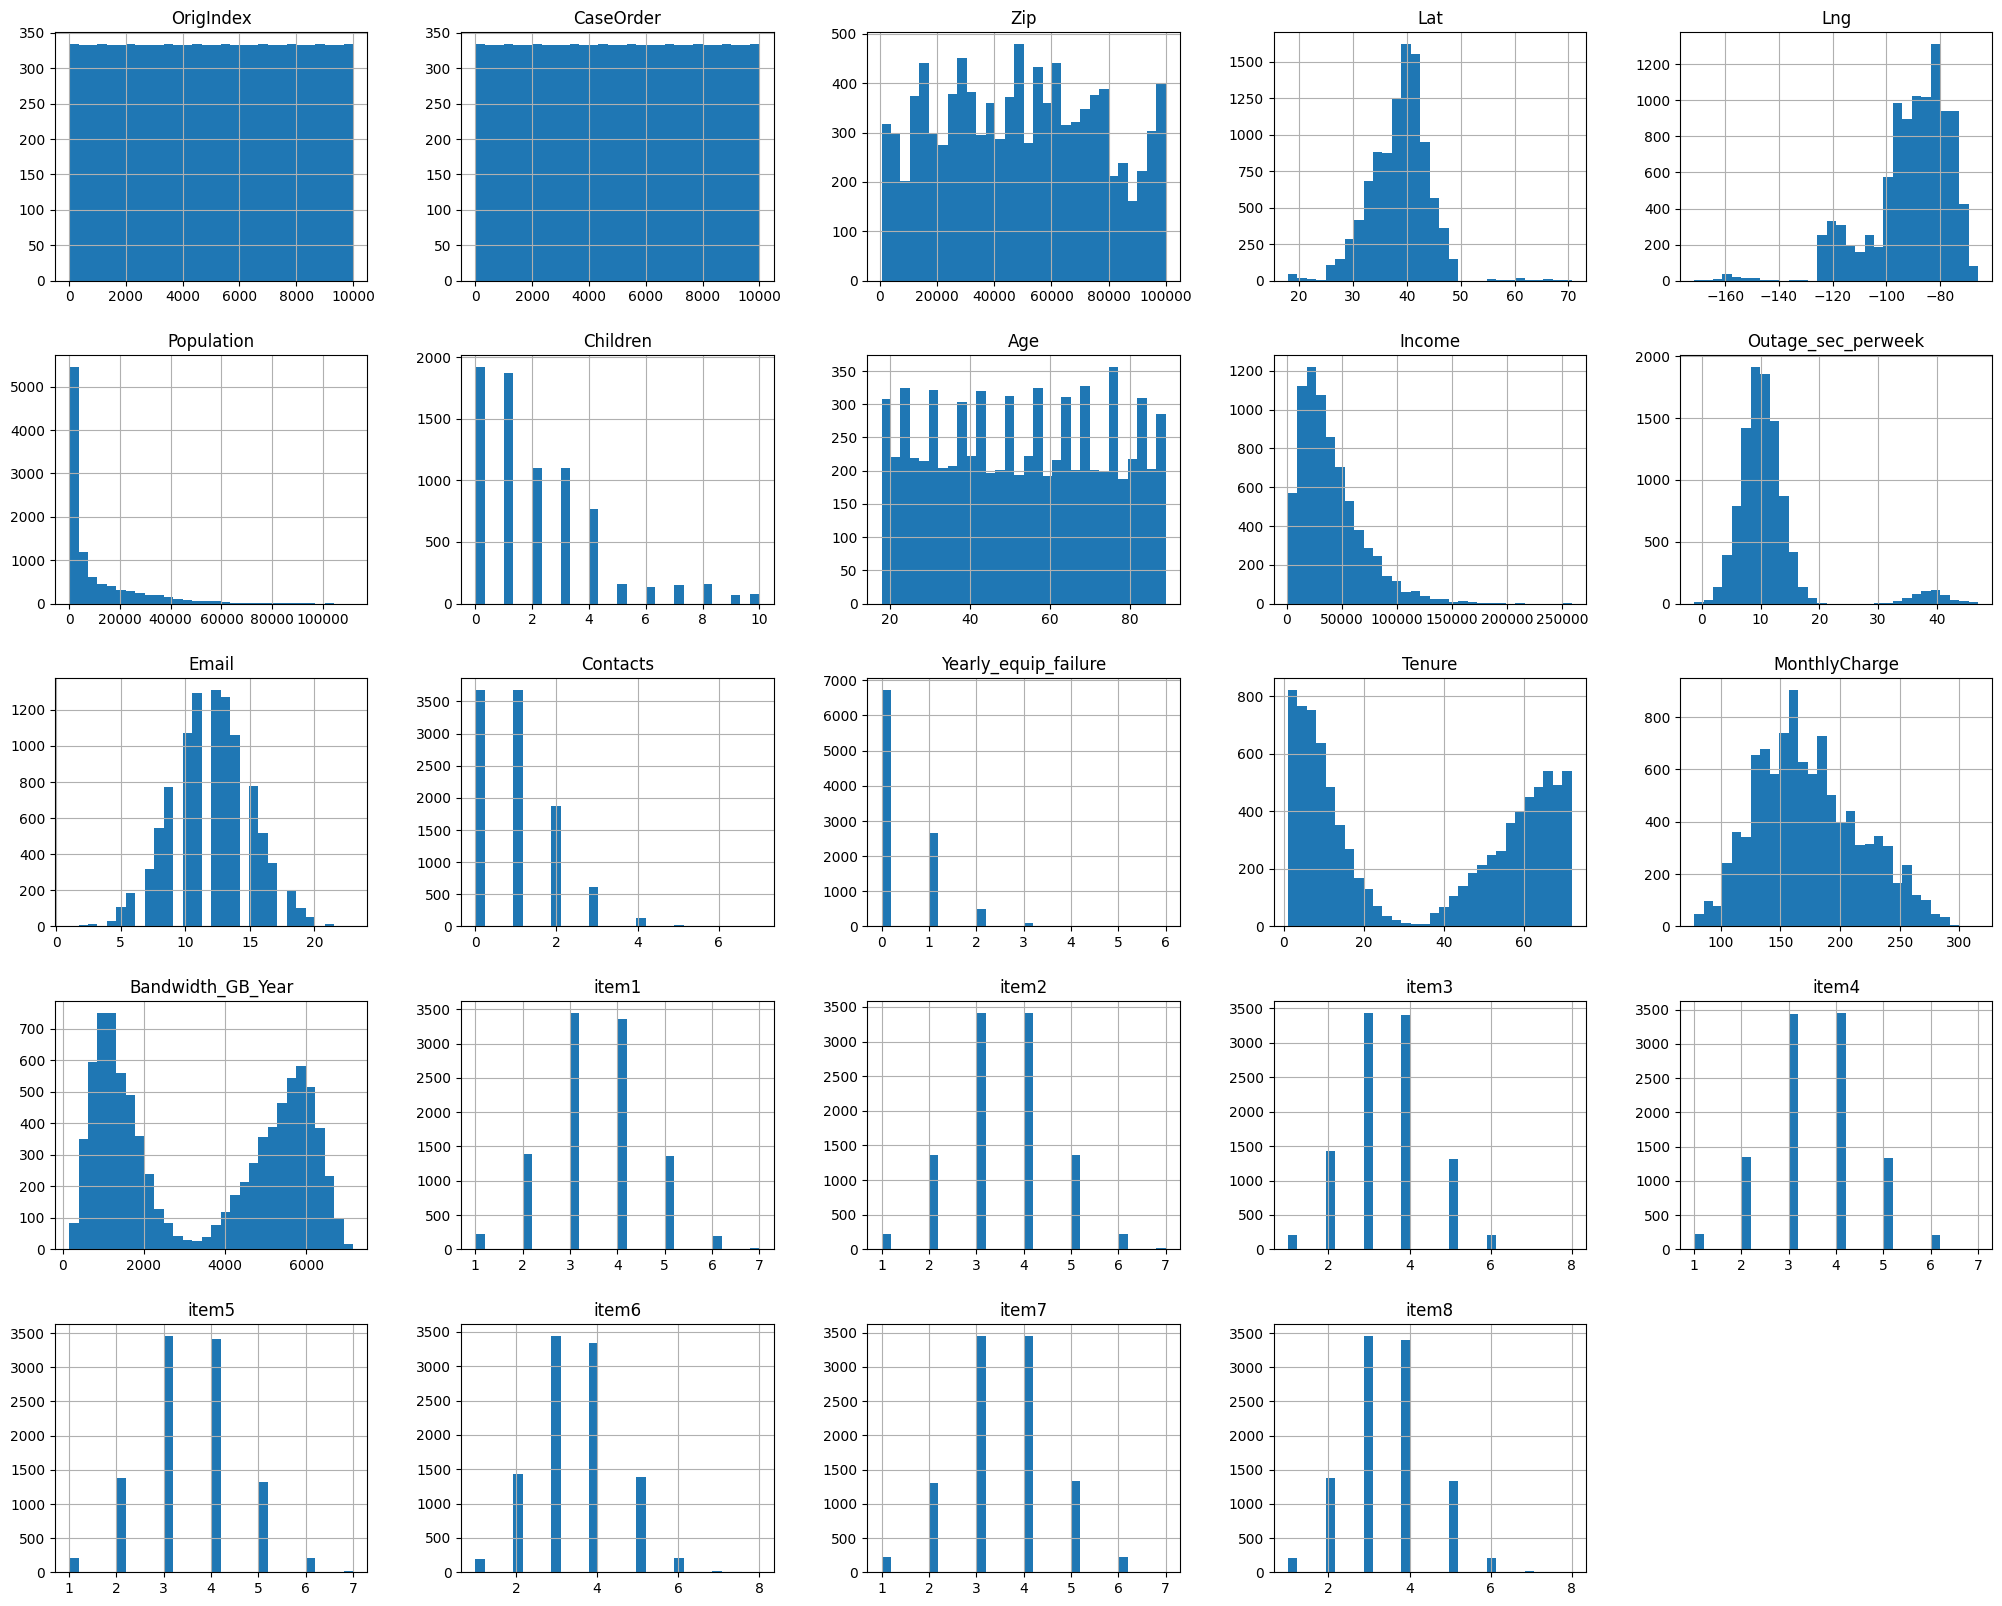

In [193]:
dat_clean.hist(bins=30, figsize=(25, 20)) #plot histograms to check for outliers

<Axes: >

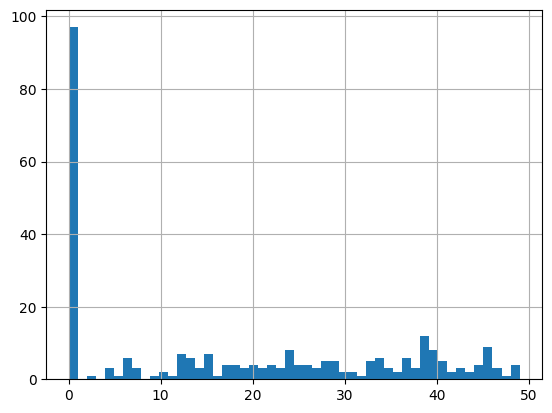

In [194]:
low_pop = dat_clean[dat_clean['Population'] < 50] #get rows with population under 50
low_pop['Population'].hist(bins=50) #plot histograms to check for outliers

In [195]:
#number of rows with population equal to zero and area equal to urban
print('Num Zero -', len(dat_clean[(dat_clean['Population'] == 0)])) 
print('Zero and Suburban -', len(dat_clean[(dat_clean['Population'] == 0) & (dat_clean['Area'] == 'Suburban') ])) 
print('Zero and Urban -', len(dat_clean[(dat_clean['Population'] == 0) & (dat_clean['Area'] == 'Urban') ])) 

Num Zero - 97
Zero and Suburban - 31
Zero and Urban - 37


***Note:*** Based on the amount of zeros in the population field, including several in urban areas, I assume that the zeros are actually "missing" data and will replace them with NaNs. Then, I can address them with the rest of the missing data. 

In [196]:
#Change zeros in population to NaN
dat_clean['Population'].replace(0, np.nan, inplace=True)
dat_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrigIndex             10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            9903 non-null   float64
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [197]:
#calculate z scores to identify outliers
numeric_cols = dat_clean.select_dtypes(include=[np.number]).columns
dat_zscores = dat_clean[numeric_cols].apply(stats.zscore)
dat_zscores

,OrigIndex,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,-1.731878,-1.731878,1.844249,3.217410,-2.810432,NaN,NaN,NaN,NaN,-0.637726,-0.666282,-1.005852,0.946658,NaN,-0.060613,NaN,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,-1.731531,-1.731531,-0.017882,1.024691,0.431644,NaN,NaN,NaN,NaN,0.079935,-0.005288,-1.005852,0.946658,NaN,1.589348,NaN,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,-1.731185,-1.731185,1.743307,1.213570,-2.142079,NaN,NaN,NaN,NaN,-0.171849,-0.996779,-1.005852,0.946658,NaN,-0.337752,NaN,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,-1.730838,-1.730838,1.556825,-1.065031,-1.746273,NaN,NaN,NaN,NaN,0.534225,0.986203,1.017588,-0.625864,NaN,-1.242158,NaN,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,-1.730492,-1.730492,1.028218,-1.724710,-0.331512,NaN,NaN,NaN,NaN,-0.354795,1.316700,1.017588,0.946658,NaN,-0.538041,NaN,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,1.730492,-1.576245,0.860078,1.187380,NaN,NaN,NaN,NaN,-0.311372,-0.005288,1.017588,-0.625864,NaN,-0.328789,NaN,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828
9996,1.730838,1.730838,-0.439919,-0.402511,0.222073,NaN,NaN,NaN,NaN,-0.474994,0.986203,1.017588,-0.625864,NaN,0.802618,NaN,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596
9997,1.731185,1.731185,1.086335,-0.595385,-0.637349,NaN,NaN,NaN,NaN,-0.941598,-0.666282,-1.005852,-0.625864,NaN,-0.135125,NaN,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596
9998,1.731531,1.731531,-0.691455,-0.952234,0.372813,NaN,NaN,NaN,NaN,0.088748,0.655706,0.005868,-0.625864,NaN,1.812746,NaN,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384


In [198]:
#check if any zscores are above 3 or below -3 to identify outliers
dat_outliers = (abs(dat_zscores[dat_zscores.columns]) > 3) #create a table with true/false values for outliers
out_sum = (abs(dat_zscores[dat_zscores.columns]) > 3).sum() #total outliers per column
print(out_sum[out_sum > 0])
print('TOTAL OUTLIERS:' , sum((abs(dat_zscores[dat_zscores.columns]) > 3).sum())) #total outliers per column

Lat                     151
Lng                     102
Outage_sec_perweek      491
Email                    12
Contacts                165
Yearly_equip_failure     94
MonthlyCharge             3
item1                    19
item2                    13
item3                    13
item4                     9
item5                    12
item6                    13
item7                    11
item8                    15
dtype: int64
TOTAL OUTLIERS: 1123


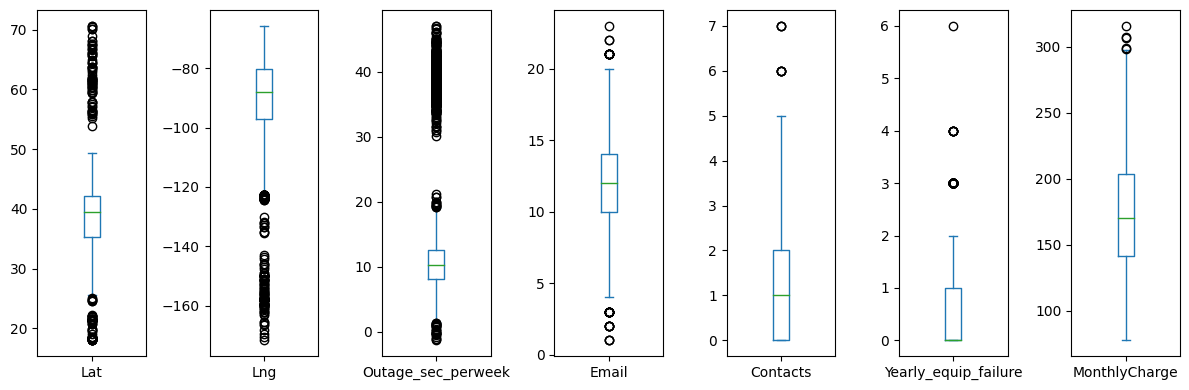

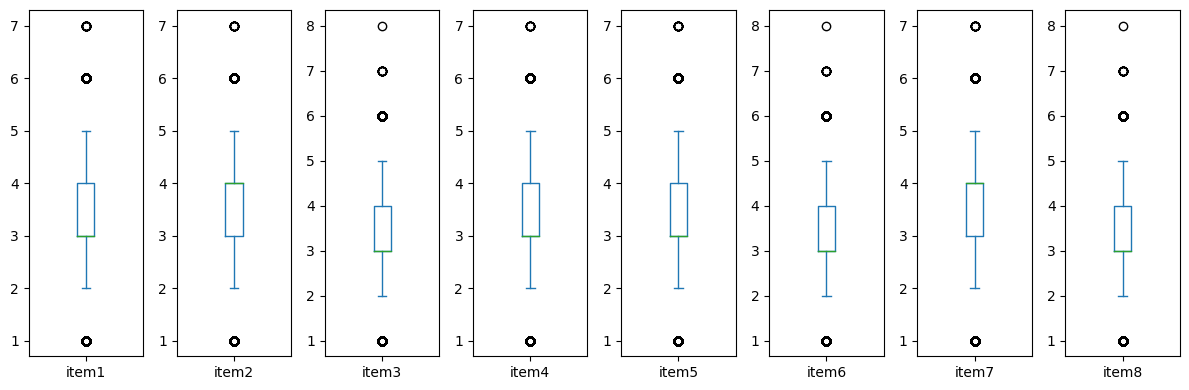

In [199]:
#dat_clean.boxplot(figsize = (12,4), rot=90, fontsize=8)
outlier_cols = out_sum[out_sum > 0].index
dat_clean[outlier_cols[0:7]].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(12, 4)
)
plt.tight_layout()
plt.show()

dat_clean[outlier_cols[7:16]].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(12, 4)
)
plt.tight_layout()
plt.show()

***NOTE:*** The outlier locations have been identified. As these outliers appear to be true outliers, and therefore contain valuable information, these will not be removed in cleaning. I would discuss the outliers with the project manager to determine how they should be handled. 

### Assess Missing Values

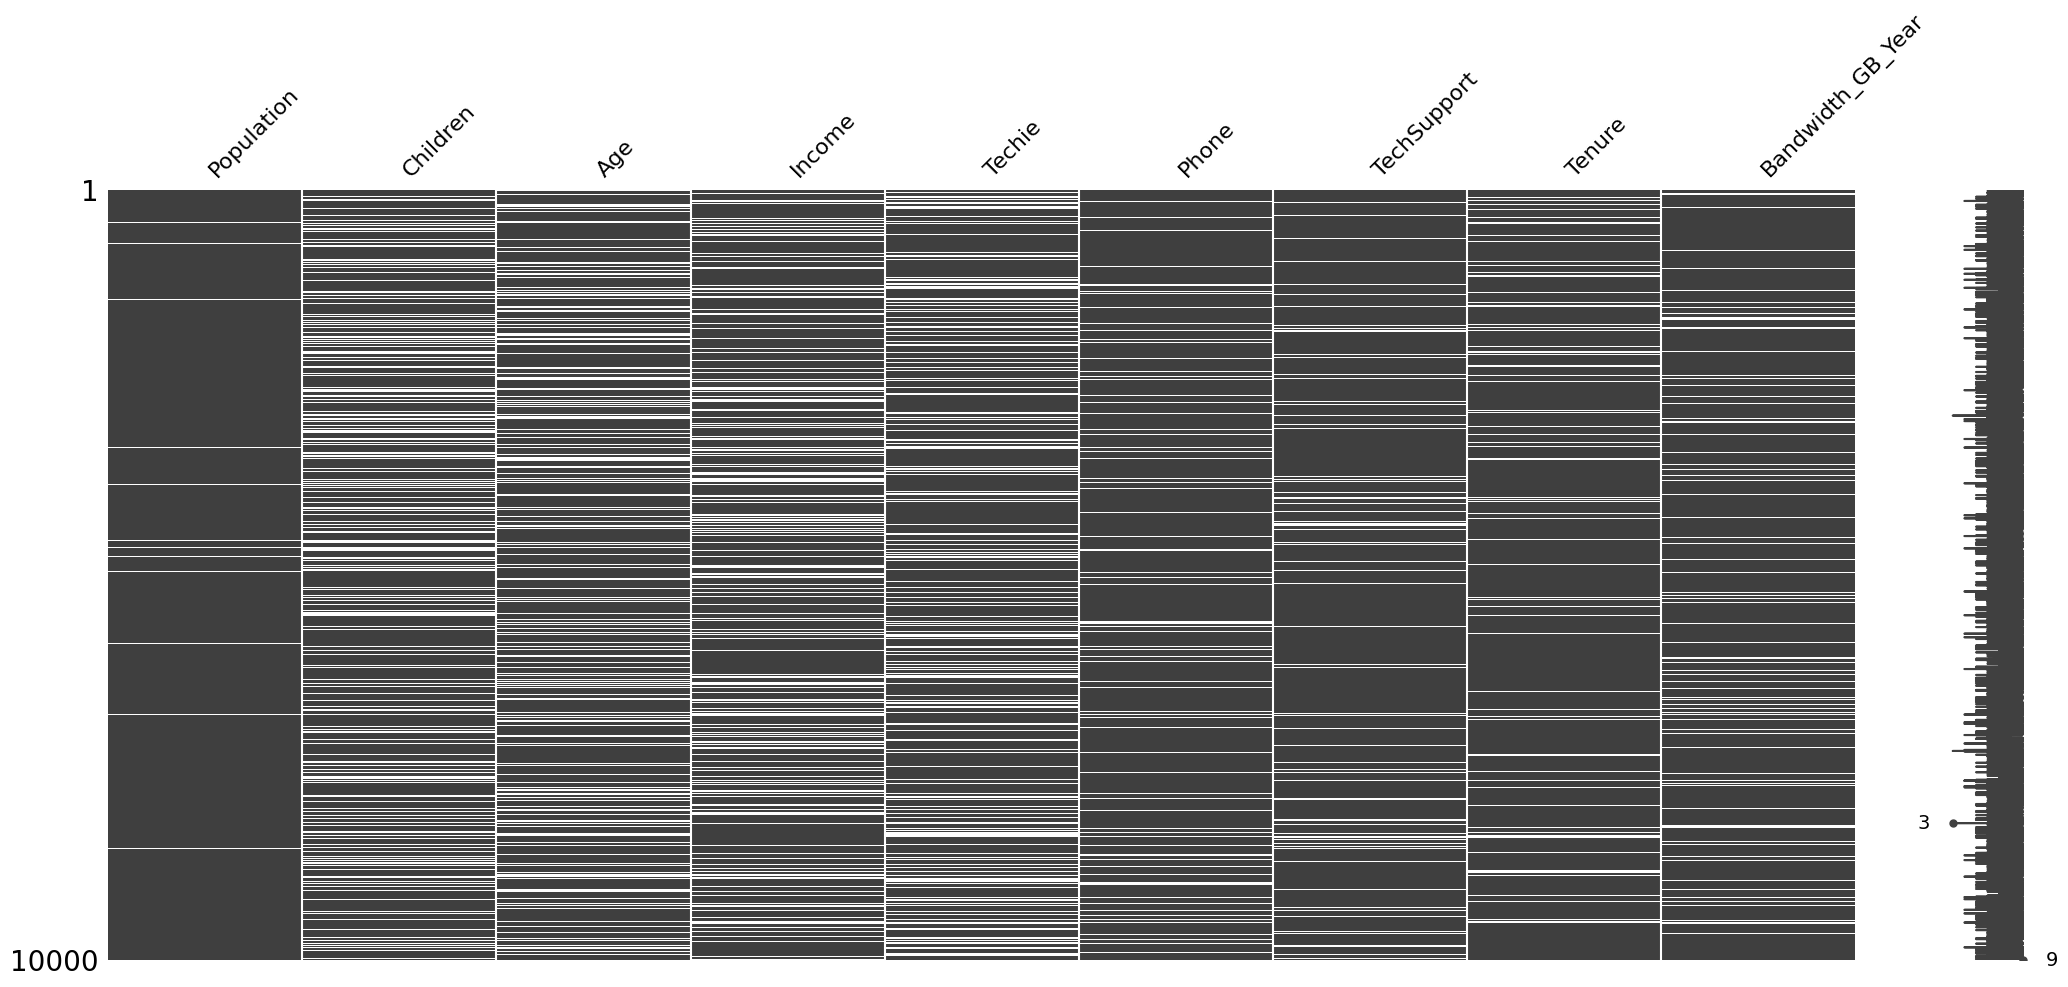

In [200]:
nan_cols = [i for i in dat_clean.columns if dat_clean[i].isnull().any()] #create list of columns with nans

msno.matrix(dat_clean[nan_cols]) #check to see if null values are randomly distributed
plt.show()

In [201]:
percent_missing = dat_clean.isnull().sum() * 100 / len(dat_clean) #calculate percent of values missing in each field
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) #create a dataframe of missing values
pd.set_option('display.max_rows', 55)
missing_value_df[(missing_value_df['percent_missing'] > 0)].sort_values('percent_missing')  #show percent of values missing in fields

,percent_missing
Population,0.97
Tenure,9.31
TechSupport,9.91
Bandwidth_GB_Year,10.21
Phone,10.26
Age,24.75
Techie,24.77
Income,24.90
Children,24.95


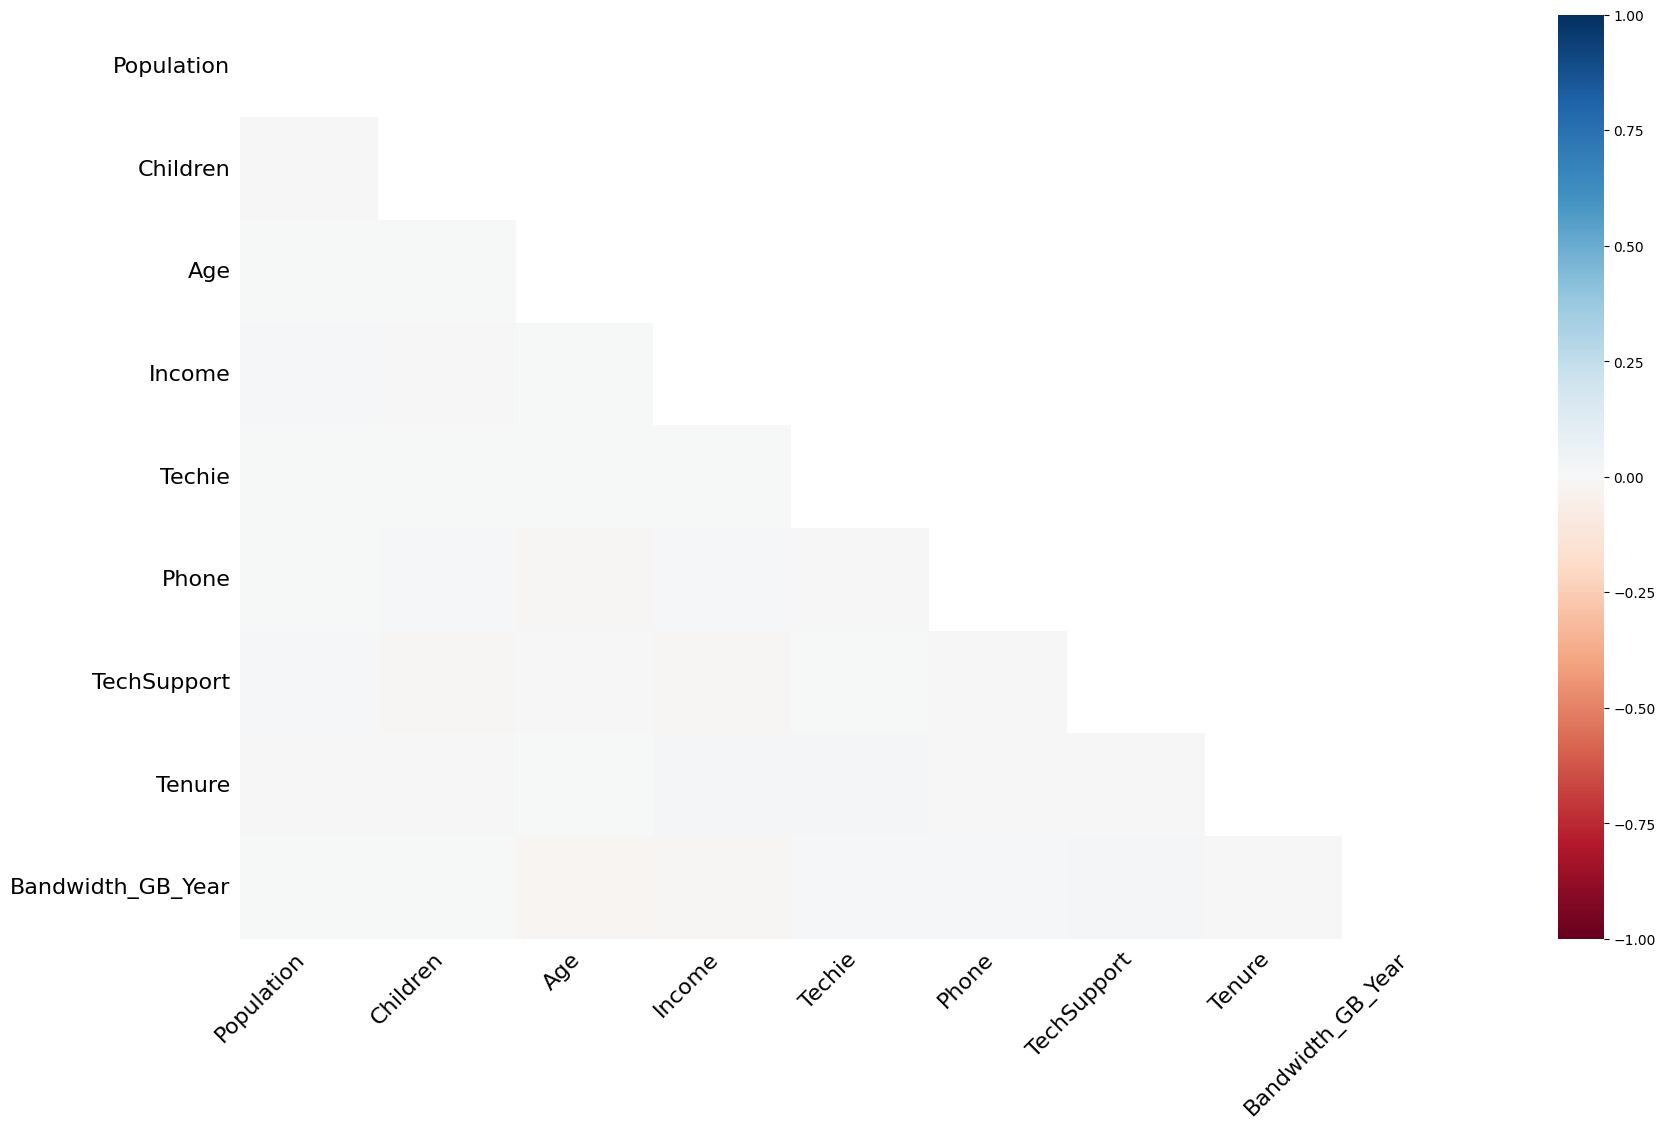

In [202]:
msno.heatmap(dat_clean[nan_cols]) #check coreelations
plt.show()

***Note:*** Based on the plots above, it appears that null values are randomly distributed in the dataset. Values will be imputed later in the "data cleaning" section. 

### Check Length of Variables

In [203]:
#create a dataframe with minimum and maxium lengths of each colomn
dat_lengths = pd.DataFrame({'minlen': pd.Series({col: dat_clean.loc[:, col].astype(str).apply(len).min() for col in dat_clean.columns}), 
                            'maxlen': pd.Series({col: dat_clean.loc[:, col].astype(str).apply(len).max() for col in dat_clean.columns})
                            })
pd.set_option('display.max_rows', 100)
dat_lengths

,minlen,maxlen
OrigIndex,1,5
CaseOrder,1,5
Customer_id,6,7
Interaction,36,36
City,3,26
State,2,2
County,3,21
Zip,3,5
Lat,4,8
Lng,6,10


***NOTE:*** From above, we can see that there may be an issue with the "zip code" column. All zip codes should be 5 digits. 

In [204]:
#show rows where zip code is less than 5 digits due to python removing leading zeros
dat_clean.loc[dat_clean['Zip'].astype(str).str.len() < 5] 
#check some of these zip codes to verify that it is the leading zeros are missing

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
11,12,12,E243720,c32b8522-d62a-49b1-a77a-e0534cb1378b,Corozal,PR,Corozal,783,18.30410,-66.32847,33372.0,Rural,America/Puerto_Rico,Maintenance engineer,2.0,56.0,Bachelor's Degree,Full Time,18342.12,Married,Female,No,5.082821,17,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,Yes,No,Yes,No,No,Electronic Check,NaN,148.364087,1180.588788,4,4,3,4,4,4,3,4
13,14,14,X44200,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,ME,Androscoggin,4228,44.43256,-70.11501,NaN,Urban,America/New_York,Learning disability nurse,5.0,NaN,No Schooling Completed,Retired,115114.57,Separated,Female,No,6.568344,14,1,0,No,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Bank Transfer(automatic),16.879220,185.659294,1948.694497,5,6,5,2,4,5,4,4
23,24,24,N37182,ab3bfaf3-94f1-4a14-b577-0e57178a7645,Baileyville,ME,Washington,4694,45.10333,-67.47223,2193.0,Urban,America/New_York,Event organiser,2.0,68.0,Bachelor's Degree,Full Time,79699.62,Divorced,Male,No,7.490199,9,0,0,NaN,One year,Yes,No,Fiber Optic,Yes,No,No,No,No,Yes,Yes,No,Yes,Electronic Check,8.543717,150.329512,945.380293,4,4,3,5,3,4,4,3
28,29,29,J887250,a49a3cbf-182c-49f5-b15f-e124582d2c8f,Moretown,VT,Washington,5660,44.24718,-72.74137,1716.0,Urban,America/New_York,Civil Service administrator,3.0,NaN,Regular High School Diploma,Full Time,NaN,Separated,Female,Yes,43.927052,13,2,0,Yes,One year,No,No,DSL,Yes,No,No,No,Yes,No,Yes,Yes,No,Bank Transfer(automatic),NaN,230.623765,1259.415493,3,4,3,3,2,4,4,2
36,37,37,U790894,01fa4db5-6be5-47de-a3ac-53b95e5c44a8,Marlborough,CT,Hartford,6447,41.63306,-72.45472,6394.0,Suburban,America/New_York,Market researcher,2.0,26.0,Regular High School Diploma,Full Time,10114.81,Never Married,Female,Yes,44.725202,16,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Credit Card (automatic),3.312992,258.408165,897.591914,4,3,5,5,2,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,9964,B619322,588c5ef7-2707-4e4f-bd51-d26992bb2912,Peaks Island,ME,Cumberland,4108,43.66057,-70.18901,896.0,Suburban,America/New_York,Ceramics designer,1.0,23.0,"Some College, 1 or More Years, No Degree",Full Time,NaN,Married,Male,No,11.345710,6,3,0,No,One year,Yes,No,None,NaN,Yes,Yes,Yes,No,No,No,No,No,Credit Card (automatic),58.474290,136.821300,5229.578000,4,4,5,4,4,3,4,4
9967,9968,9968,Q597995,17ead91e-fee8-4b36-bec3-60610ced2732,Lynnfield,MA,Essex,1940,42.53456,-71.03757,13484.0,Rural,America/New_York,Legal secretary,0.0,87.0,"Some College, Less than 1 Year",Part Time,16074.96,Never Married,Male,No,8.014046,7,0,3,No,Month-to-month,No,No,DSL,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Electronic Check,68.812870,209.167500,6524.466000,1,1,2,2,5,3,1,3
9978,9979,9979,G988623,ee6cf273-7bfb-437c-99fb-6bf5801af411,Bath,NH,Grafton,3740,44.18070,-71.98280,656.0,Rural,America/New_York,Mental health nurse,5.0,NaN,Doctorate Degree,Full Time,NaN,Divorced,Female,No,5.679755,18,0,0,No,Month-to-month,No,No,None,Yes,No,No,Yes,No,No,Yes,No,No,Mailed Check,NaN,125.733500,5252.241000,4,4,3,3,3,3,2,4
9993,9994,9994,W608373,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,Machias,ME,Washington,4654,44.77104,-67.55341,3209.0,Rural,America/New_York,Clinical research associate,0.0,42.0,Bachelor's Degree,Full Time,NaN,Separated,Female,No,9.204619,15,3,0,Yes,Two Year,Yes,No,None,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Credit Card (automatic),59.865960,163.966

***NOTE:*** It appears zip codes lost the leading zeros when they were imported as numeric. This will have to be dealt with during data cleaning.

## Data Cleaning

### Re-Express Variables

In [205]:
 #add leading zeros to zip code and change to string
dat_zips = dat_clean['Zip'].astype(str).str.rjust(5, "0")
dat_zips #preview zip codes with zeros

0       99927
1       48661
2       97148
3       92014
4       77461
        ...  
9995    05758
9996    37042
9997    79061
9998    30117
9999    30523
Name: Zip, Length: 10000, dtype: object

In [206]:
dat_clean['Zip'] = dat_zips #replace in data frame
#check to see if there are any zipcodes not equal to 5
print('Short Zip Codes:', len(dat_clean[dat_clean['Zip'].str.len() != 5])) 

Short Zip Codes: 0


In [207]:
#re-express education field as numeric
#print(dat_clean['Education'].unique()) #view the values in the education field
dat_clean['Education_num'] = dat_clean['Education'] #create a new field for numeric education field
edu_rep = {'Education_num': {
    "Master's Degree": 18,
    'Regular High School Diploma': 12,
    'Doctorate Degree': 20,
    'No Schooling Completed': 0,
    "Associate's Degree": 14, 
    "Bachelor's Degree": 16,
    'Some College, Less than 1 Year':13, 
    'GED or Alternative Credential': 11,
    'Some College, 1 or More Years, No Degree': 15,
    '9th Grade to 12th Grade, No Diploma': 10, 
    'Nursery School to 8th Grade': 8,
    'Professional School Degree': 19
    }}
dat_clean.replace(edu_rep, inplace=True) #replace values

In [208]:
#re-express contract field as numeric
#print(dat_clean['Contract'].unique()) #view the values in the education field
dat_clean['Contract_num'] = dat_clean['Contract'] #create a new field for numeric education field
cont_rep = {'Contract_num': {
    'One year': 1,
    'Month-to-month': 0,
    'Two Year': 2
    }}
dat_clean.replace(cont_rep, inplace=True) #replace values

In [209]:
#change yes/no to 0/1
obj_cols = dat_clean.select_dtypes(include=['object']).columns
for i in obj_cols:
    dat_clean = dat_clean.replace({i: {'Yes': 1, 'No': 0}}) #replace yes / no cols with 1 / 0

In [210]:
#pd.set_option('display.max_columns', 55)
dat_clean.head() #check data

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Education_num,Contract_num
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,18,1
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,12,0
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,1,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,12,2
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,20,2
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,18,0


In [211]:
dat_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrigIndex             10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            9903 non-null   float64
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

### Imputing Missing Data using Multivariate Iterative Imputation

In [212]:
#pull out numeric columns to use for model - non numeric columns will create an error
dat_mod = dat_clean.select_dtypes(include=np.number)
dat_mod.head() #show selected columns
len(dat_mod.columns)

38

In [155]:
#compare imputers - make graphs for report
#mi_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
#knn = KNNImputer()
#dat_fillMI = pd.DataFrame(mi_imputer.fit_transform(dat_mod), columns = dat_mod.columns)
#dat_fillKNN = pd.DataFrame(knn.fit_transform(dat_mod), columns = dat_mod.columns)
#plots
#fig, axes = plt.subplots(1, 2)
#dat_fillMI.hist('Income', bins=100, ax=axes[0])
#dat_fillKNN.hist('Income', bins=100, ax=axes[1])

array([[<Axes: title={'center': 'OrigIndex'}>,
        <Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Lat'}>, <Axes: title={'center': 'Lng'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Children'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>,
        <Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>],
       [<Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Techie'}>,
        <Axes: title={'center': 'Port_modem'}>,
        <Axes: title={'center': 'Tablet'}>,
        <Axes: title={'center': 'Phone'}>,
        <Axes: title={'center': 'Multiple'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'

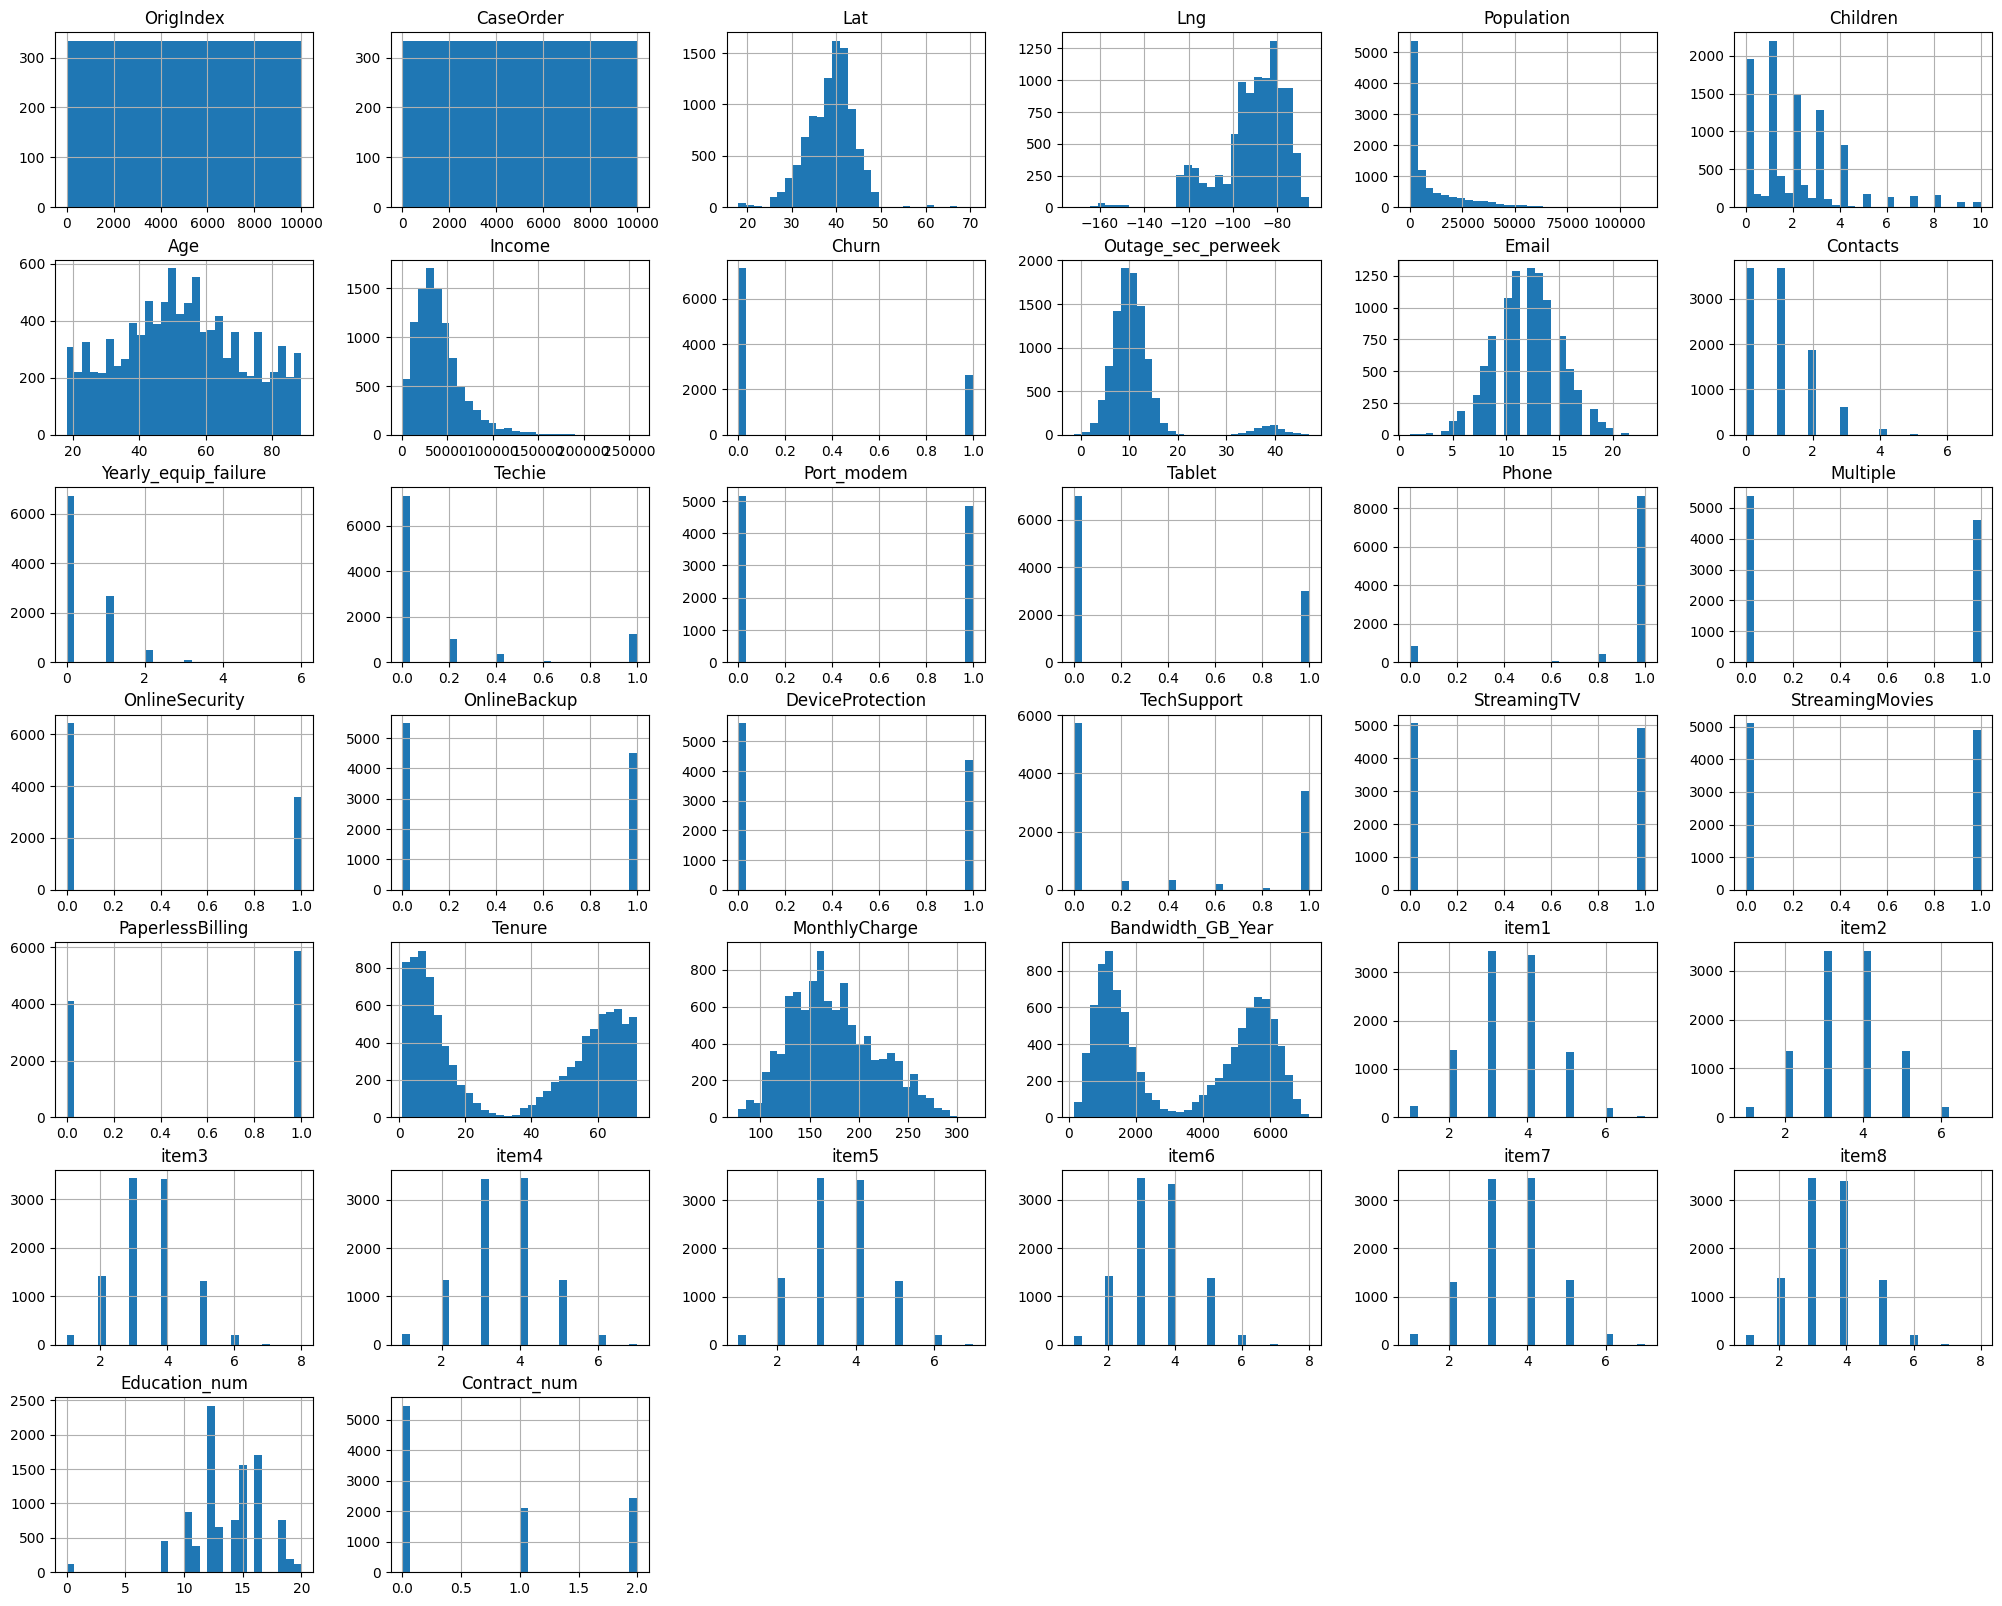

In [213]:
#impute missing data using multivariate iterative imputation
#mi_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
knn = KNNImputer()
dat_fill = pd.DataFrame(knn.fit_transform(dat_mod), columns = dat_mod.columns)
dat_fill.hist(bins=30, figsize=(25, 20)) #plot histograms to check for outliers

In [214]:
dat_fill.info()
dat_fill.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrigIndex             10000 non-null  float64
 1   CaseOrder             10000 non-null  float64
 2   Lat                   10000 non-null  float64
 3   Lng                   10000 non-null  float64
 4   Population            10000 non-null  float64
 5   Children              10000 non-null  float64
 6   Age                   10000 non-null  float64
 7   Income                10000 non-null  float64
 8   Churn                 10000 non-null  float64
 9   Outage_sec_perweek    10000 non-null  float64
 10  Email                 10000 non-null  float64
 11  Contacts              10000 non-null  float64
 12  Yearly_equip_failure  10000 non-null  float64
 13  Techie                10000 non-null  float64
 14  Port_modem            10000 non-null  float64
 15  Tablet              

,OrigIndex,CaseOrder,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Education_num,Contract_num
0,1.0,1.0,56.25100,-133.37571,38.0,4.0,68.0,28561.99,0.0,6.972566,10.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,6.795513,171.449762,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,18.0,1.0
1,2.0,2.0,44.32893,-84.24080,10446.0,1.0,27.0,21704.77,1.0,12.014541,12.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.156681,242.948015,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,12.0,0.0
2,3.0,3.0,45.35589,-123.24657,3735.0,4.0,50.0,74292.53,0.0,10.245616,9.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.754144,159.440398,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,12.0,2.0
3,4.0,4.0,32.96687,-117.24798,13863.0,1.0,48.0,18925.23,0.0,15.206193,15.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,17.087227,120.249493,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,20.0,2.0
4,5.0,5.0,29.38012,-95.80673,11352.0,0.0,83.0,40074.19,1.0,8.960316,16.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.670972,150.761216,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,18.0,0.0


In [215]:
#round integer variables to whole numbers
dat_fill['Children'] = dat_fill['Children'].round()
dat_fill['Churn'] = dat_fill['Churn'].round()
dat_fill['Techie'] = dat_fill['Techie'].round()
dat_fill['Tablet'] = dat_fill['Tablet'].round()
dat_fill['Phone'] = dat_fill['Phone'].round()
dat_fill['Multiple'] = dat_fill['Multiple'].round()
dat_fill['OnlineSecurity'] = dat_fill['OnlineSecurity'].round()
dat_fill['OnlineBackup'] = dat_fill['OnlineBackup'].round()
dat_fill['DeviceProtection'] = dat_fill['DeviceProtection'].round()
dat_fill['TechSupport'] = dat_fill['TechSupport'].round()
dat_fill['StreamingTV'] = dat_fill['StreamingTV'].round()
dat_fill['StreamingMovies'] = dat_fill['StreamingMovies'].round()
dat_fill['PaperlessBilling'] = dat_fill['PaperlessBilling'].round()
dat_fill.head()

,OrigIndex,CaseOrder,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Education_num,Contract_num
0,1.0,1.0,56.25100,-133.37571,38.0,4.0,68.0,28561.99,0.0,6.972566,10.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,6.795513,171.449762,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,18.0,1.0
1,2.0,2.0,44.32893,-84.24080,10446.0,1.0,27.0,21704.77,1.0,12.014541,12.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.156681,242.948015,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,12.0,0.0
2,3.0,3.0,45.35589,-123.24657,3735.0,4.0,50.0,74292.53,0.0,10.245616,9.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.754144,159.440398,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,12.0,2.0
3,4.0,4.0,32.96687,-117.24798,13863.0,1.0,48.0,18925.23,0.0,15.206193,15.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,17.087227,120.249493,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,20.0,2.0
4,5.0,5.0,29.38012,-95.80673,11352.0,0.0,83.0,40074.19,1.0,8.960316,16.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.670972,150.761216,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,18.0,0.0


In [216]:
#replace dat_clean with filled data
dat_clean[nan_cols] = dat_fill[nan_cols]
dat_clean.info() #preview data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrigIndex             10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

In [217]:
dat_clean['Techie'] = dat_clean['Techie'].astype(int)
dat_clean['Phone'] = dat_clean['Phone'].astype(int)
dat_clean['TechSupport'] = dat_clean['TechSupport'].astype(int)
dat_clean['Children'] = dat_clean['Children'].astype(int)
dat_clean['Age'] = dat_clean['Age'].astype(int)
dat_clean['Population'] = dat_clean['Population'].astype(int)
dat_clean.head() #check data

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Education_num,Contract_num
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,4,68,Master's Degree,Part Time,28561.99,Widowed,Male,0,6.972566,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,18,1
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,Regular High School Diploma,Retired,21704.77,Married,Female,1,12.014541,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,12,0
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,Regular High School Diploma,Student,74292.53,Widowed,Female,0,10.245616,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,12,2
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,Doctorate Degree,Retired,18925.23,Married,Male,0,15.206193,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,20,2
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,Master's Degree,Student,40074.19,Separated,Male,1,8.960316,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,18,0


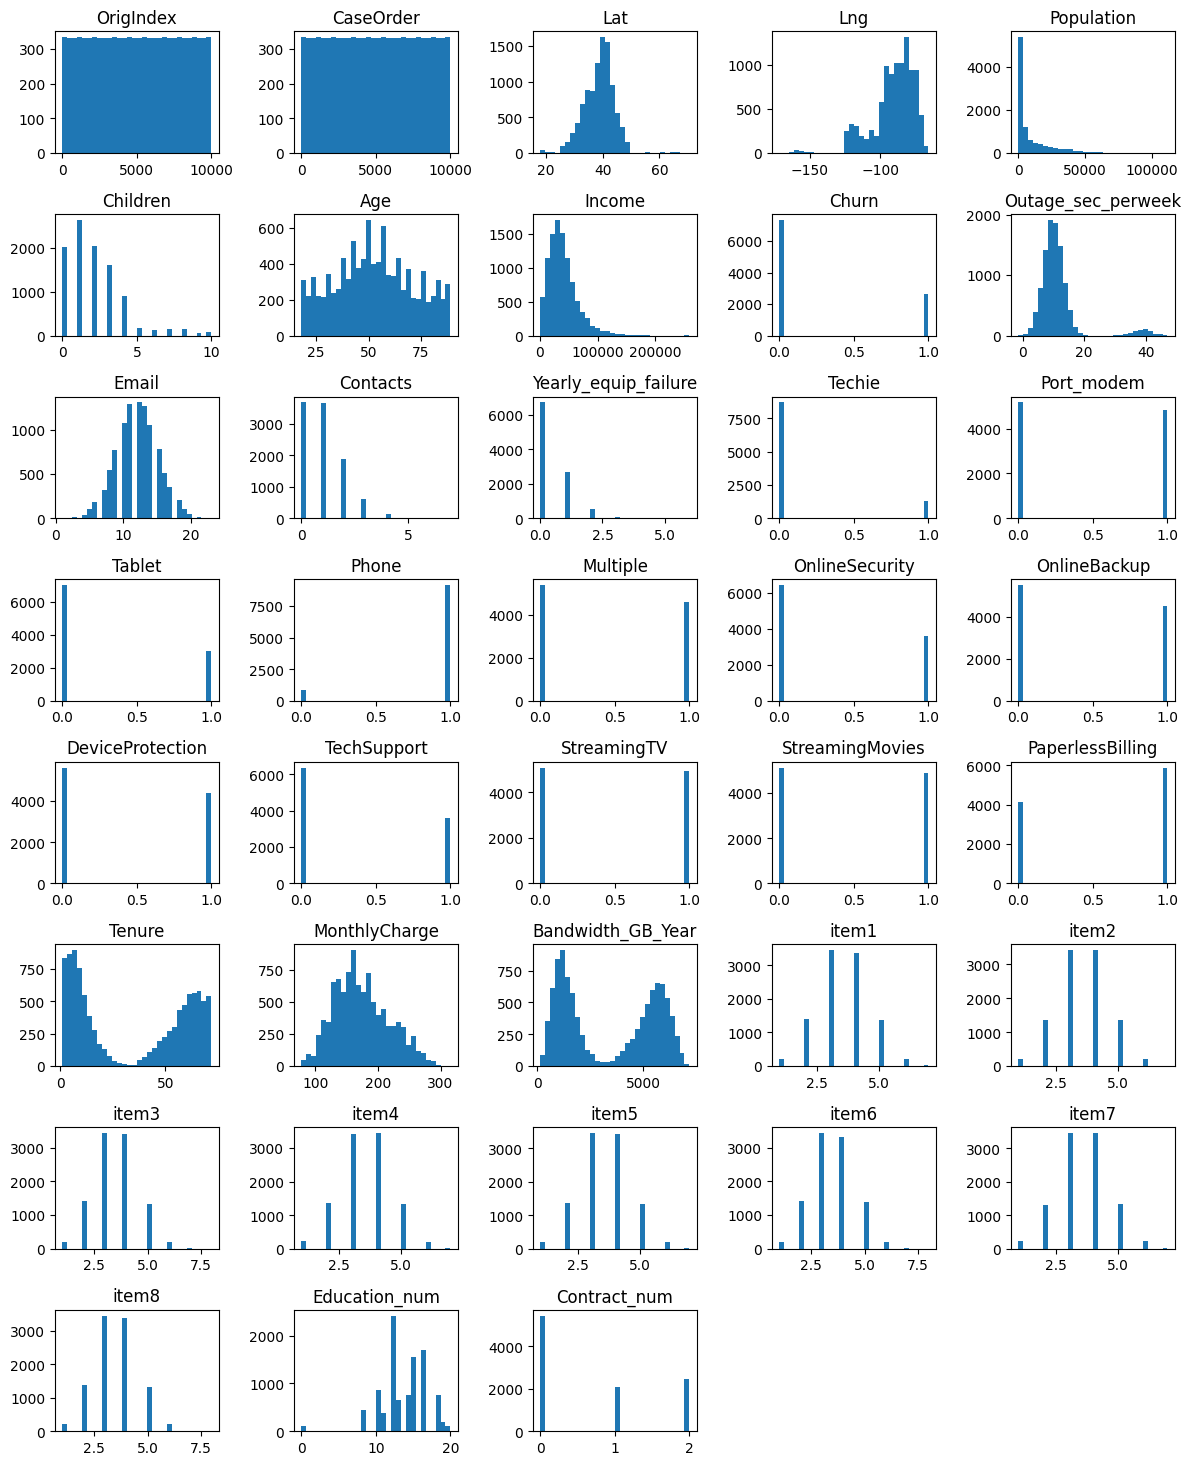

In [218]:
dat_clean.hist(bins=30, figsize=(12, 20), grid = False, layout = (11,5)) #plot histograms
plt.tight_layout()
plt.show()

In [219]:
dat_types = pd.DataFrame(dat_clean.dtypes)
dat_nulls = dat_clean.count()
dat_info = pd.concat([dat_types, dat_nulls], axis=1)
dat_info = dat_info.reset_index()
dat_info
# Reassign column names
col_names = ["feature", "data_type", "count_non_null"]
dat_info.columns = col_names
dat_info

,feature,data_type,count_non_null
0,OrigIndex,int64,10000
1,CaseOrder,int64,10000
2,Customer_id,object,10000
3,Interaction,object,10000
4,City,object,10000
5,State,object,10000
6,County,object,10000
7,Zip,object,10000
8,Lat,float64,10000
9,Lng,float64,10000


In [220]:
dat_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrigIndex             10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Export Clean Data

In [221]:
#export clean data to CSV
dat_clean.to_csv("~/Desktop/WGU/D206/churn_clean_data.csv")
dat_info.to_csv("~/Desktop/WGU/D206/churn_clean_info.csv")

## Principal Component Analysis (PCA)

In [222]:
pd.set_option('display.max_columns', 55)
dat_clean.head()

,OrigIndex,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Education_num,Contract_num
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,4,68,Master's Degree,Part Time,28561.99,Widowed,Male,0,6.972566,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,18,1
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,Regular High School Diploma,Retired,21704.77,Married,Female,1,12.014541,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,12,0
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,Regular High School Diploma,Student,74292.53,Widowed,Female,0,10.245616,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,12,2
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,Doctorate Degree,Retired,18925.23,Married,Male,0,15.206193,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,20,2
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,Master's Degree,Student,40074.19,Separated,Male,1,8.960316,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,18,0


In [223]:
#pull out continuous numeric columns
dat_churn = dat_clean[['Lat', 'Lng', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
dat_churn.head()

,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,56.25100,-133.37571,28561.99,6.972566,6.795513,171.449762,904.536110
1,44.32893,-84.24080,21704.77,12.014541,1.156681,242.948015,800.982766
2,45.35589,-123.24657,74292.53,10.245616,15.754144,159.440398,2054.706961
3,32.96687,-117.24798,18925.23,15.206193,17.087227,120.249493,2164.579412
4,29.38012,-95.80673,40074.19,8.960316,1.670972,150.761216,271.493436


In [224]:
from sklearn.decomposition import PCA #import package

In [225]:
len(dat_churn.columns) #determine number of columns

7

In [226]:
dat_norm=(dat_churn-dat_churn.mean())/dat_churn.std() #normalize the data
dat_norm.head()

,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,3.217249,-2.810291,-0.455445,-0.637694,-1.047345,-0.060610,-1.141913
1,1.024639,0.431623,-0.725098,0.079931,-1.260992,1.589269,-1.189512
2,1.213510,-2.141972,1.342859,-0.171841,-0.707916,-0.337735,-0.613230
3,-1.064978,-1.746186,-0.834400,0.534199,-0.657408,-1.242096,-0.562726
4,-1.724623,-0.331496,-0.002740,-0.354778,-1.241506,-0.538014,-1.432895


In [227]:
pca = PCA(n_components=dat_churn.shape[1])
pca.fit(dat_norm)

#create column labels for PCA
nums = list(range(len(dat_churn.columns)+1))
nums.remove(0)
nums = [str(x) for x in nums]
names = ['PC' + x for x in nums]
names

#make pca dataframe
dat_pca = pd.DataFrame(pca.transform(dat_norm),     
     columns=names)

dat_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.664789,0.652764,4.126574,-0.697634,-0.370093,-0.642441,0.066785
1,-1.701857,1.334076,-0.071514,-0.711530,-1.031984,-1.022969,0.015217
2,-0.952959,0.277481,2.450738,1.192605,0.668270,-0.136359,-0.077348
3,-0.919296,-0.433971,0.618950,-0.850029,2.018045,1.109049,-0.122486
4,-1.882016,-0.869468,-0.813245,0.085197,1.452529,0.063497,0.116698
...,...,...,...,...,...,...,...
9995,1.905491,-0.471750,-0.037885,0.613892,-1.470817,0.124881,-0.122865
9996,1.495582,0.042064,-0.492304,-0.059854,0.066774,-0.855983,-0.002151
9997,0.607422,-0.813070,0.200529,-0.387460,0.772298,-0.596479,0.130236
9998,2.053606,0.935553,-1.305298,-0.977552,0.362308,-1.112787,0.053234


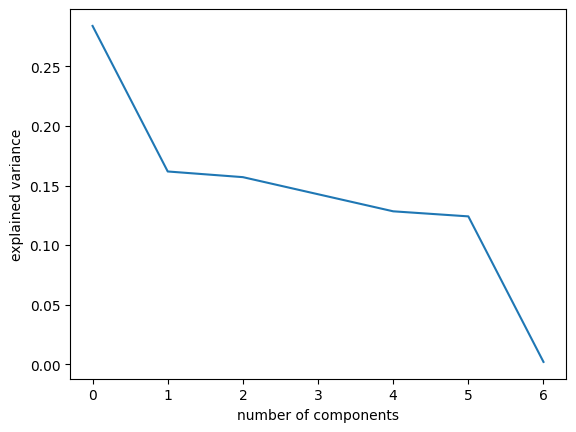

In [228]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

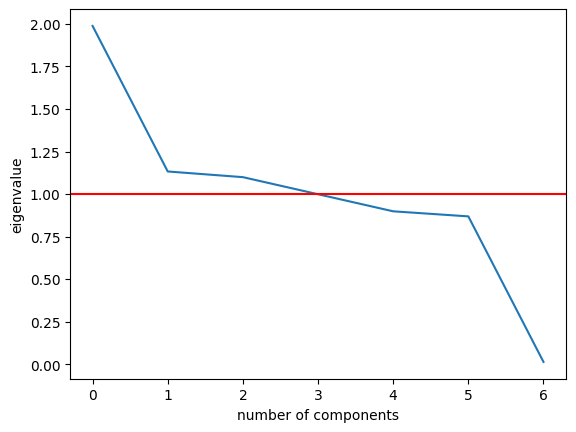

In [229]:
#plot with eigenvalues
cov_matrix = np.dot(dat_norm.T, dat_norm) / dat_churn.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show() 

In [230]:
#output loadings
loadings = pd.DataFrame(pca.components_.T,
     columns=names,
     index=dat_churn.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.021745,0.215930,0.669184,-0.026792,-0.710180,0.004431,-0.000294
Lng,0.007828,-0.140692,-0.693148,0.068483,-0.698195,0.086739,0.000146
Income,0.029756,0.018949,0.063170,0.996219,0.026540,-0.040060,0.001941
Outage_sec_perweek,0.017791,0.691870,-0.136016,0.020958,0.085254,0.703394,-0.005417
Tenure,0.705232,-0.042300,0.027202,-0.021694,-0.008071,0.036090,0.705890
MonthlyCharge,0.042082,0.672819,-0.219734,-0.028295,-0.007105,-0.703325,0.041751
Bandwidth_GB_Year,0.706499,-0.007868,0.014977,-0.020729,-0.008907,-0.010983,-0.707067


In [231]:
loadings.to_csv("~/Desktop/WGU/D206/churn_pca_loadings.csv")

In [232]:
#show max of each column
for x in loadings.columns[0:15]:
    print(x)
    print(abs(loadings[x]).nlargest(n=10))
    print()

PC1
Bandwidth_GB_Year     0.706499
Tenure                0.705232
MonthlyCharge         0.042082
Income                0.029756
Lat                   0.021745
Outage_sec_perweek    0.017791
Lng                   0.007828
Name: PC1, dtype: float64

PC2
Outage_sec_perweek    0.691870
MonthlyCharge         0.672819
Lat                   0.215930
Lng                   0.140692
Tenure                0.042300
Income                0.018949
Bandwidth_GB_Year     0.007868
Name: PC2, dtype: float64

PC3
Lng                   0.693148
Lat                   0.669184
MonthlyCharge         0.219734
Outage_sec_perweek    0.136016
Income                0.063170
Tenure                0.027202
Bandwidth_GB_Year     0.014977
Name: PC3, dtype: float64

PC4
Income                0.996219
Lng                   0.068483
MonthlyCharge         0.028295
Lat                   0.026792
Tenure                0.021694
Outage_sec_perweek    0.020958
Bandwidth_GB_Year     0.020729
Name: PC4, dtype: float64

PC5
Lat 